## Q1
###  Produce five informative plots revealing aspects of this data.   These must include
1. at least one data map
2. at least one scatter plot
3. at least one histogram or bar chart

For each plot, write a paragraph in your notebook showing interesting stuff the visualization reveals.


### Map 1 : DataMap -  World Capitals

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from mpl_toolkits.basemap import Basemap

In [2]:
df = pd.read_csv('country-data.csv')
df =df.replace('unknown',np.nan)
df = df.dropna()

In [3]:

def calculateLatLon(value):
    lists = value.split()
    value= float(lists[0]+'.'+lists[1])
    if(lists[2] in ['W','S']):
        value = -value
    return value
    

In [4]:
capitals = pd.concat((df['Capital City'],df['Latitude of Capital'],df['Longitude of Capital']),axis=1)
capitals.replace('nan',np.nan,regex=True)
capitals = capitals.dropna()

capitals['Latitude of Capital'] = capitals['Latitude of Capital'].apply(calculateLatLon)
capitals['Longitude of Capital']  = capitals['Longitude of Capital'].apply(calculateLatLon)

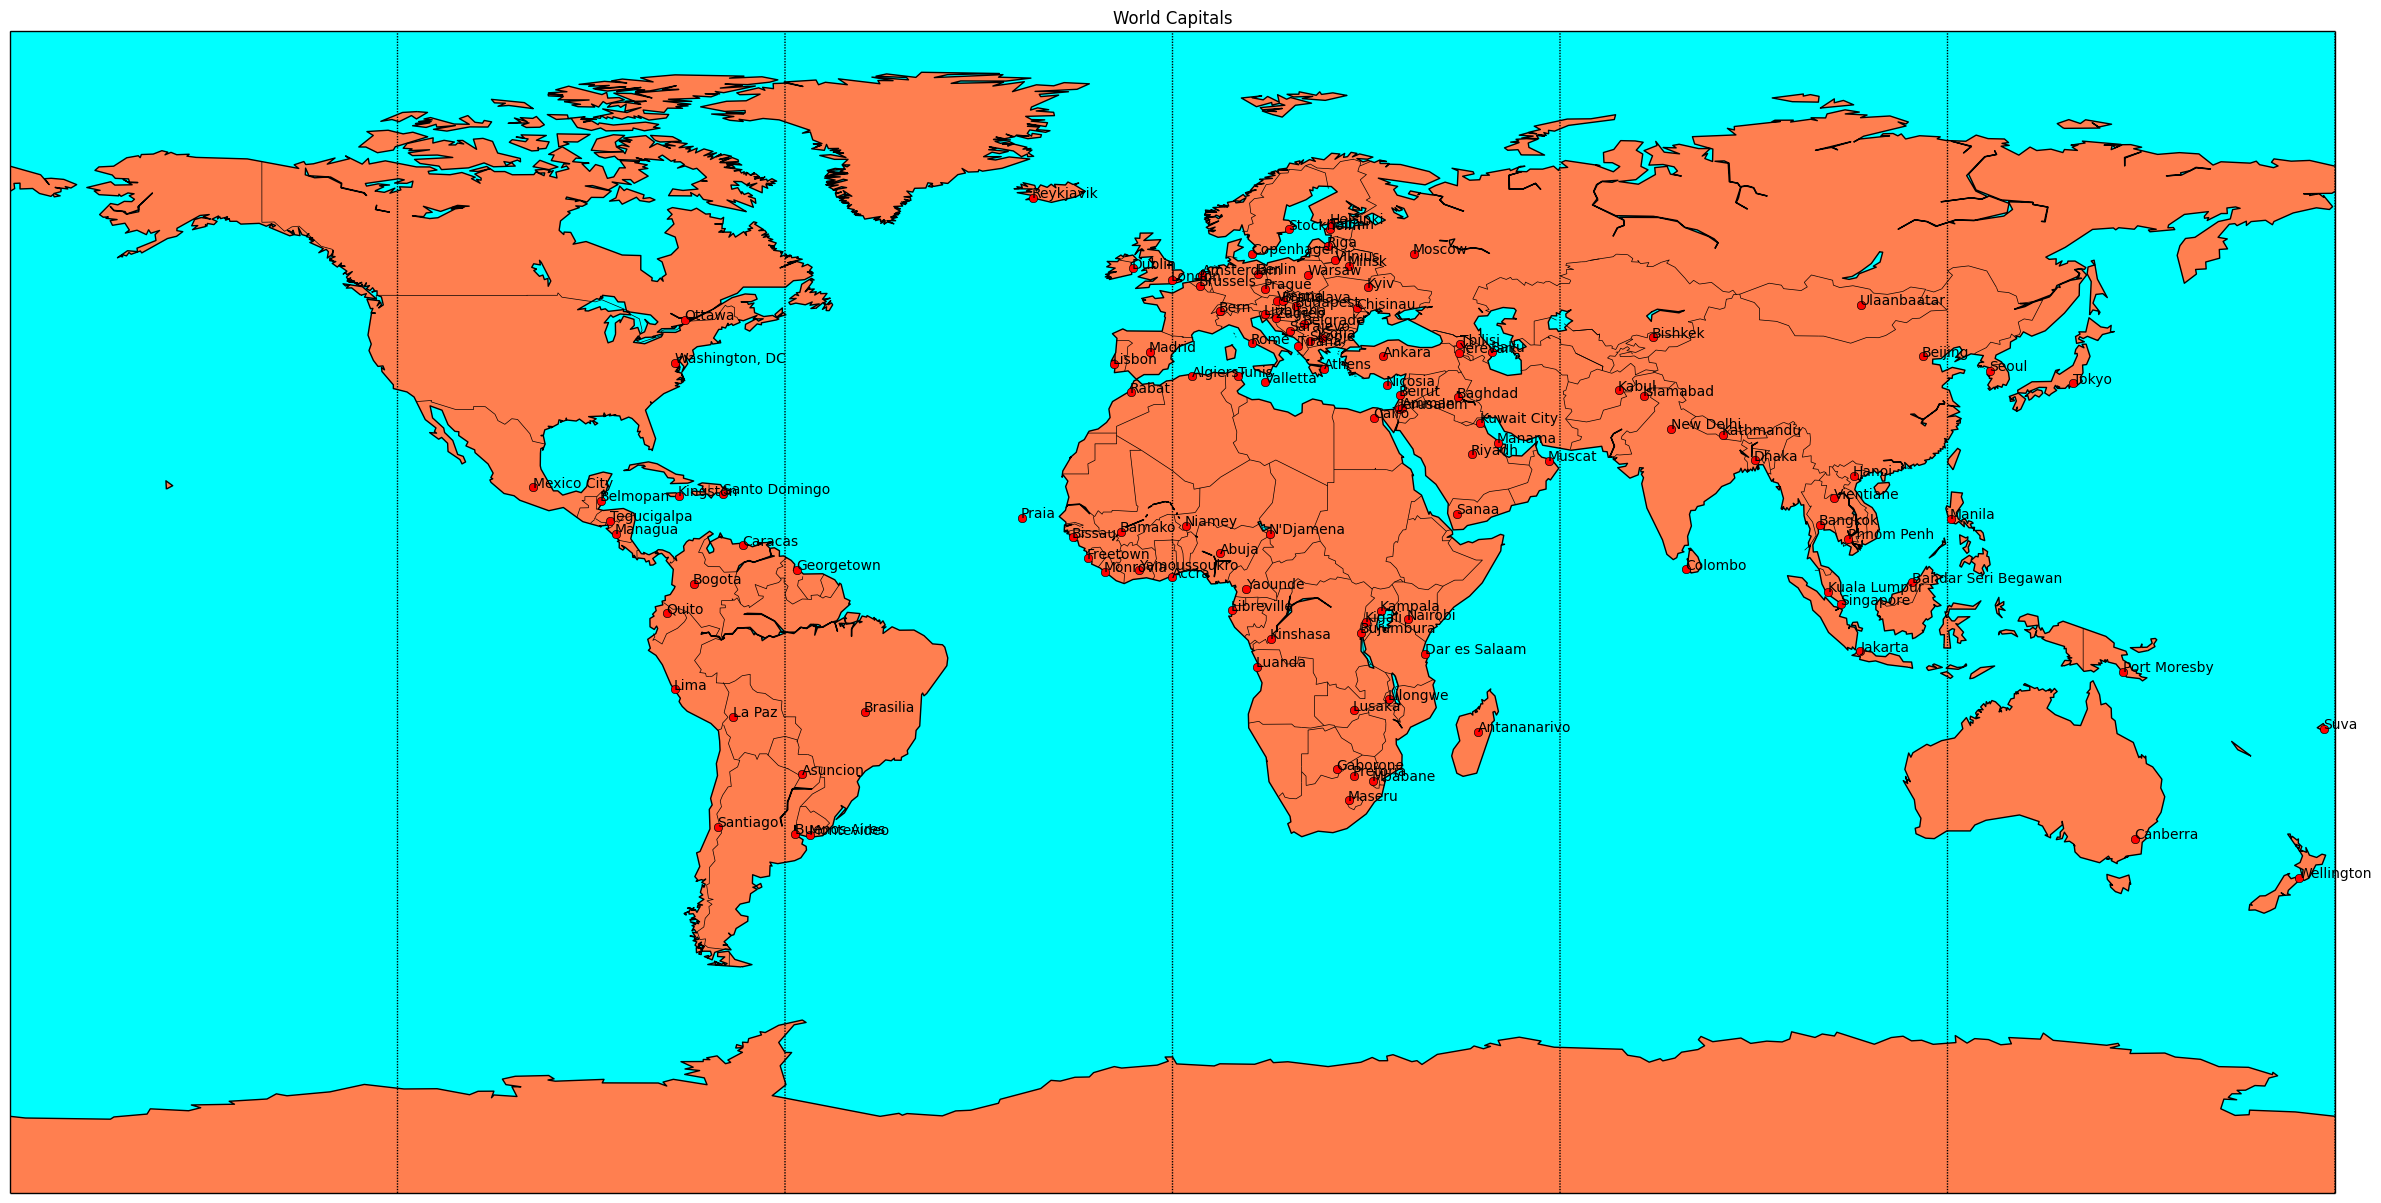

In [5]:
plt.figure(figsize=(30,35))
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180)
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')

x = capitals['Longitude of Capital']
y = capitals['Latitude of Capital']

m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')

for i,capital in capitals.loc[:,['Capital City','Latitude of Capital','Longitude of Capital']].iterrows():
    m.plot(capital['Longitude of Capital'],capital['Latitude of Capital'],marker='o', color='r',latlon=True)
    plt.annotate(capital['Capital City'], (capital['Longitude of Capital'],capital['Latitude of Capital']))
plt.title("World Capitals")
plt.show()



### Map 2: Datamap - Life Expectancy

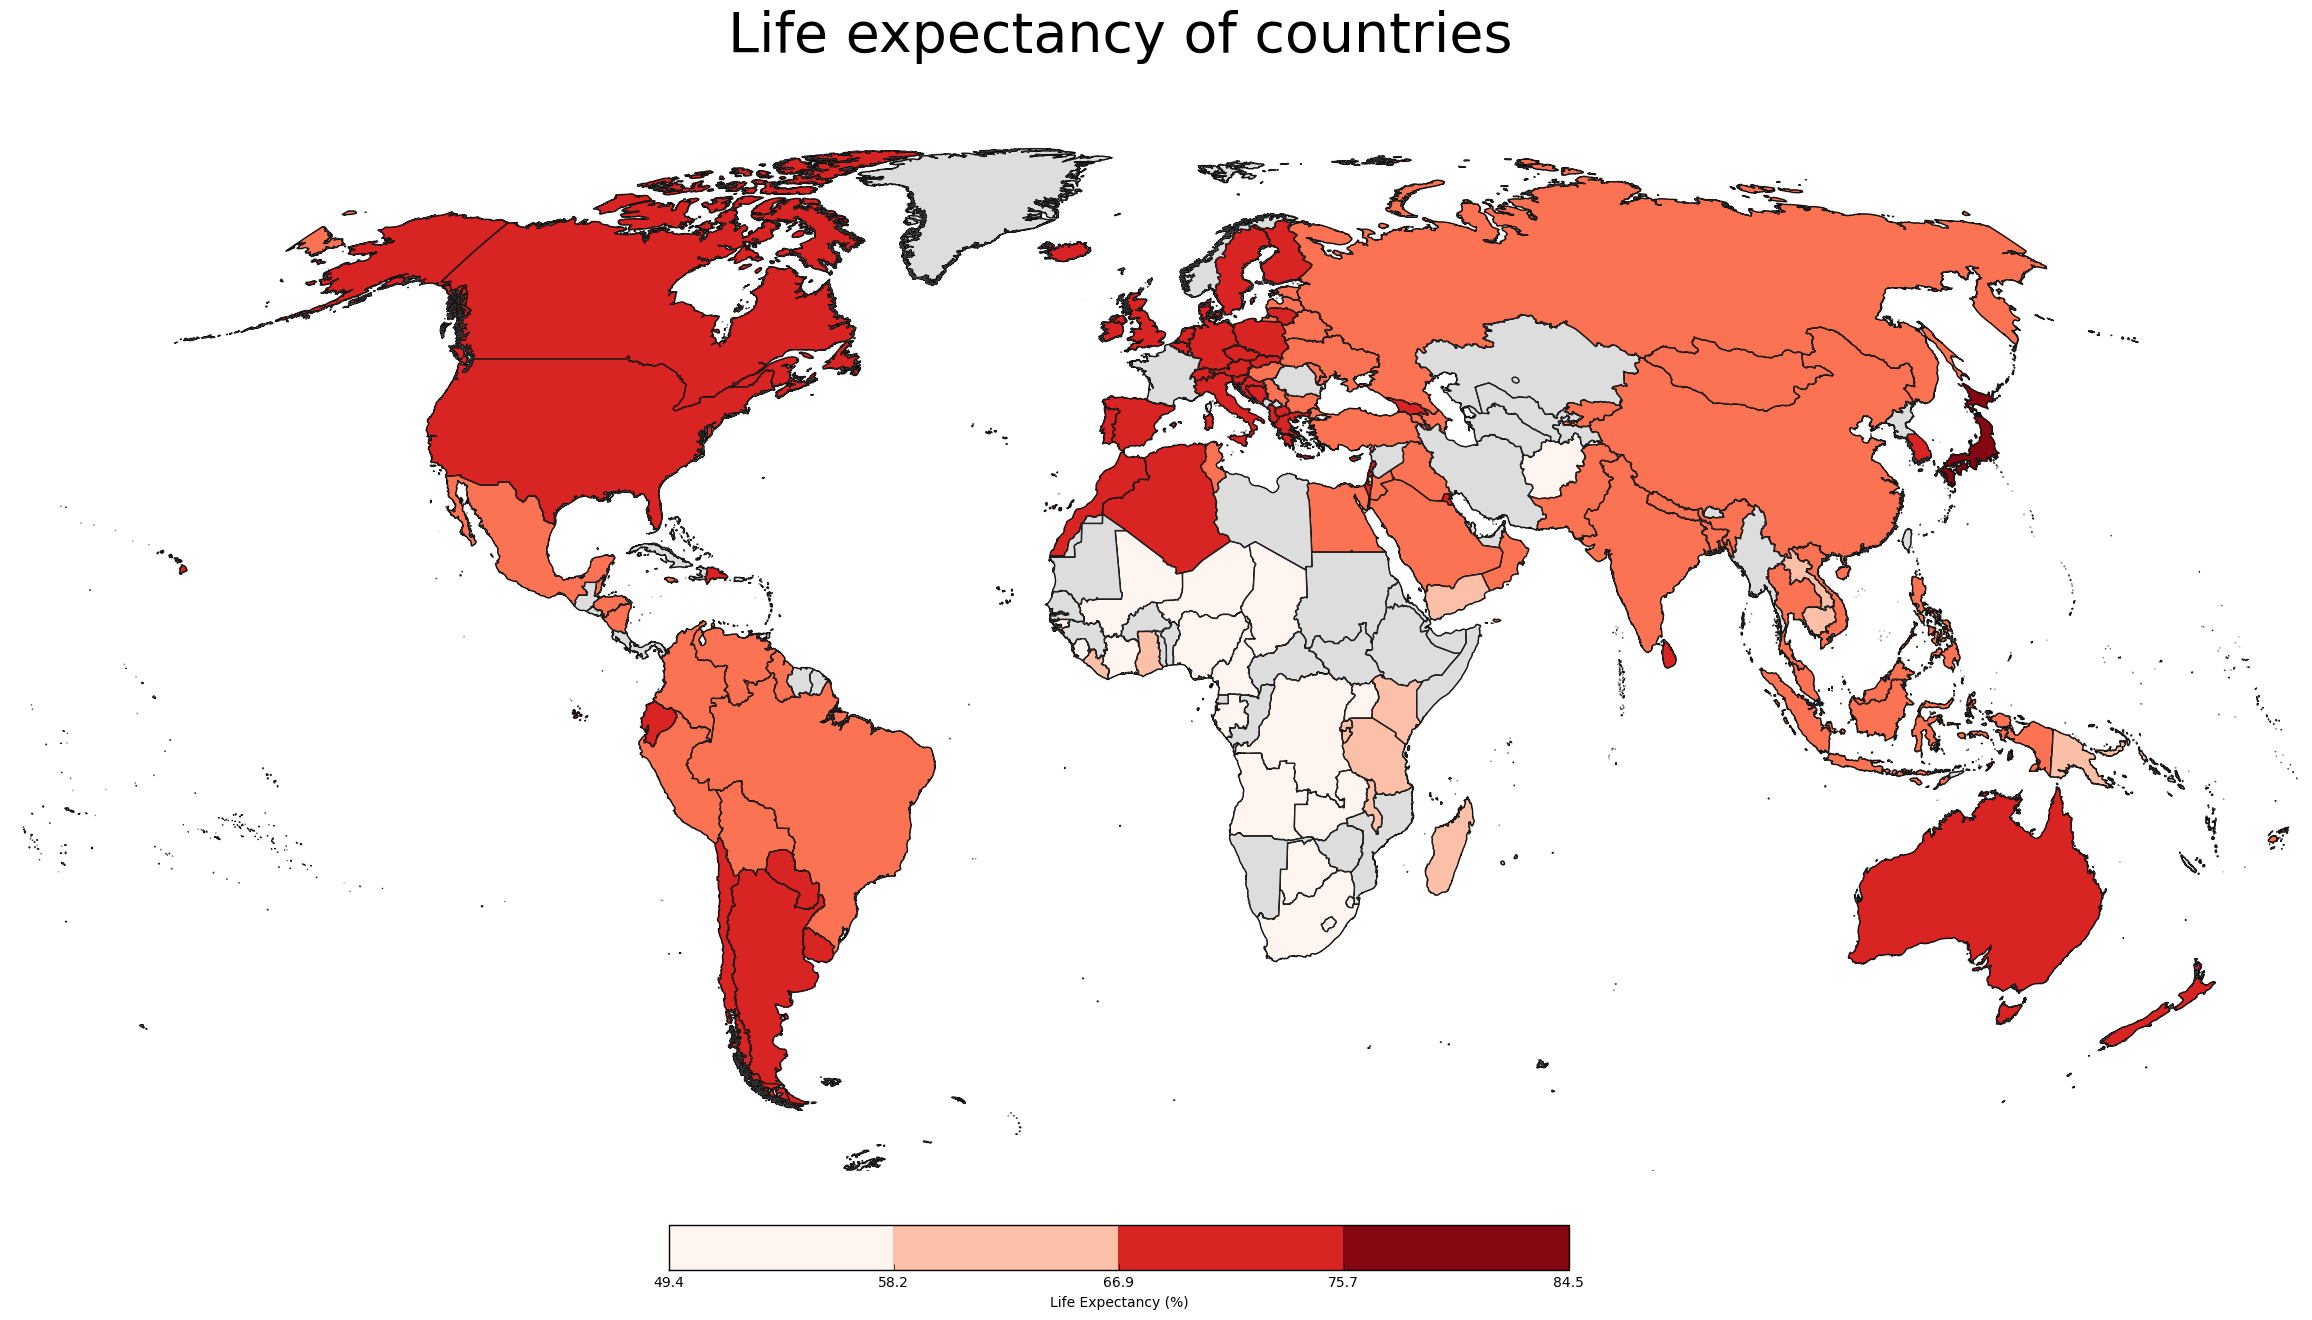

In [78]:
import matplotlib as mpl
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure(figsize=(30, 15))

subplot = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Life expectancy of countries', fontsize=40)

# The below line paints white color on the Antartica region
subplot.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

file_shape = 'ne_10m_admin_0_countries/ne_10m_admin_0_countries'

num_colors = 5

color_map = plt.get_cmap('Reds')
scheme = [color_map(i*300 / num_colors) for i in range(5)]

bins = np.linspace(df['Life Expectancy'].min(), df['Life Expectancy'].max(), num_colors)
df['bin'] = np.digitize(df['Life Expectancy'], bins) - 1

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

m.readshapefile(file_shape, 'units', color='#444444', linewidth=.2)

for info, shape in zip(m.units_info, m.units):
    country_code = info['ISO_A2']

    if country_code not in df['Country Code'].values:
        color = '#dddddd'
    else:
        color = scheme[df.loc[df['Country Code']==country_code,'bin'].values[0]]
    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    subplot.add_collection(pc)


legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(legend, cmap=cmap, boundaries=bins, ticks=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])
cb.set_label('Life Expectancy (%)')

plt.show()

**Note**: The countries marked in gray are those with not adequate data

**Observations:**
1. The life expectancy in Australia, North America, West Europe is very high. This sounds reasonable as they are developed countries and people and the government have the resources to spend on Health Care
2. Most of the countries in Africa on the other hand has very less life expectancy. Africa is still way behind the rest of the world in Health Care.
3. Most of Asia falls in the middle region when it comes to life expectancy. This can be attributed to very high population and developing countries like India, China.

**References**
 * http://ramiro.org/notebook/basemap-choropleth/

### Map 3: Scatter Plot

In [7]:
population = df['Population']
area = df['Area (sq km)']
area = area.sort_values()

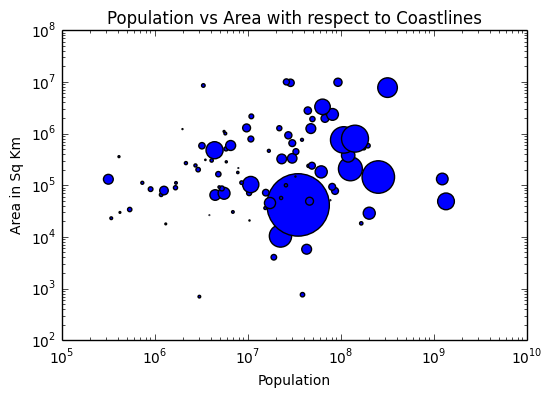

In [8]:
coastline = df['Coastline (km)']/100
plt.scatter(population,area,s= coastline)
xlabel = 'Population'
ylabel = 'Area in Sq Km'
plt.xscale('log')
plt.yscale('log')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Population vs Area with respect to Coastlines ")
plt.show()

**Note:**  The size of the circle potrays the length of the coastline that a country has.

**Observations:**
1. A country with a greater area doesn't necessarily mean that the population would be higher
2. However, one can reasonably say with that the countries with greater coastline length have greater population.


### Map 4: Histogram

In [9]:
literacy_rate = df['Literacy Rate (%)'].astype(float)

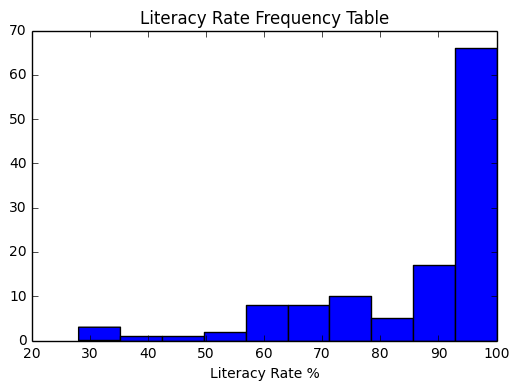

In [10]:
plt.hist(literacy_rate.dropna(),bins=10)
plt.xlabel('Literacy Rate %')
plt.title('Literacy Rate Frequency Table')
plt.show()

**Observations:**
Majority of the countries have a literacy rate between 90-100%. This is a good sign as the world is giving more importance to education.

### Map 5: Scatter Plot

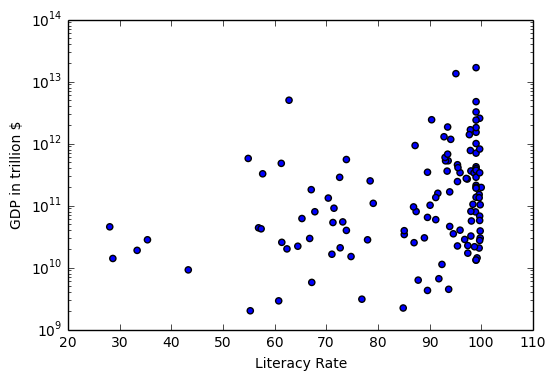

In [11]:
literacy_rate = df['Literacy Rate (%)'].astype(float)
plt.scatter(literacy_rate,df['GDP (PPP) in US $'])
plt.yscale('log',basex=10)
plt.xlabel('Literacy Rate')
plt.ylabel('GDP in trillion $')
plt.show()

**Observations:** 
As a general trend, as the literacy rate increases the GDP of the country also increases. Though there are a lot of countries with very high literacy rate and very low GDP, however, this might be related to other factors like the population of the country. An interesting case here is that India with a literacy rate of just 62% has the 3rd highest GDP in the world

## Q2
### Do a pairwise Pearson correlation analysis on all valid pairs of variables. Find out most positive and negative correlations. Do a permutation test to determine the p-values of these 2 correlations to test which are significant (what fraction of permutations produce at least this high a correlation)

In [12]:
df = pd.read_csv('country-data.csv')
df.columns

Index([u'Country Name', u'Country Code', u'Government Type', u'Capital City',
       u'Date of Founding/Independence', u'Latitude of Capital',
       u'Longitude of Capital', u'Population', u'Life Expectancy',
       u'GDP (PPP) in US $', u'Area (sq km)', u'Land Boundaries (km)',
       u'Coastline (km)', u'Literacy Rate (%)', u'Health Expenditure/GDP',
       u'Military Expenditure/GDP', u'Renewable Water Resources (cu km)',
       u'Net Migration Rate/1000 Population', u'Labor Force',
       u'Internet Users (circa 2009)', u'Commercial Prime Lending Rate'],
      dtype='object')

In [13]:
# Wrote this code initially but then later found the np.pearsonr function to calculate the correlation
def calculate_correlation(list1, list2):
    product = list1 * list2
    list1_sqaure = list1**2
    list2_square = list2**2
    sum_list1 = np.sum(list1)
    sum_list2 = np.sum(list2)
    sum_product = np.sum(product)
    sum_list1_square = np.sum(list1_sqaure)
    sum_list2_square = np.sum(list2_square)
    n= len(list1)
    numerator = n*sum_product - sum_list2*sum_list1
    denominator = np.sqrt((n*sum_list2_square - sum_list2**2)*(n*sum_list1_square-sum_list1**2))
    correlation_coeff = numerator/denominator
    return correlation_coeff

In [14]:
'''The correlation coefficient between the literacy rate and the internet users is 0.12
which surprisingly means there is very less correlation between the two '''

'The correlation coefficient between the literacy rate and the internet users is 0.12\nwhich surprisingly means there is very less correlation between the two '

In [15]:
df = df.replace('unknown',np.nan,regex=True)
df = df.dropna()

In [16]:
result = []
for column1 in df.columns:
    for column2 in df.columns.difference([column1]):
        try: 
            r, p = pearsonr(df[column1].astype(float),df[column2].astype(float))
            result.append([column1, column2, r, p])
        except Exception as e:
            continue

result  = np.array(result)
max_positive = result[result[:,2].astype(float)==max(result[:,2].astype(float))][0]
min_negative =  result[result[:,2].astype(float)==min(result[:,2].astype(float))][0]

max_positive, min_negative

(array(['Population', 'Labor Force', '0.980104966424', '1.9956826043e-85'], 
       dtype='|S34'),
 array(['Life Expectancy', 'Commercial Prime Lending Rate',
        '-0.44429315395', '3.31017259827e-07'], 
       dtype='|S34'))

In [61]:
print 'Maximum positive correlation is ' + str(round(max_positive[2].astype(float),2))+ ' between '\
+ max_positive[0] + ' and '+ max_positive[1] + ' with a p value of '+ str(round(max_positive[3].astype(float),3)) + '\n'
print 'Maximum negative correlation is ' + str(round(min_negative[2].astype(float),2))+ ' between '\
+ min_negative[0] + ' and '+ min_negative[1] + '\nwith a p value of '+ str(round(min_negative[3].astype(float),3))
print '\nSince the p values for both the correlation is 0.0, they are significant'

Maximum positive correlation is 0.98 between Population and Labor Force with a p value of 0.0

Maximum negative correlation is -0.44 between Life Expectancy and Commercial Prime Lending Rate
with a p value of 0.0

Since the p values for both the correlation is 0.0, they are significant


#### Permutation Tests
In order to validate that the pearson co-efficient we got from the above computation is valied, we perform random permutation on the second column for both the max and min correlation. 
We then store the r values of the resulting permutations and plot a frequency distribution graph to decide if our initial claim of hte correlation being significant is true or not.

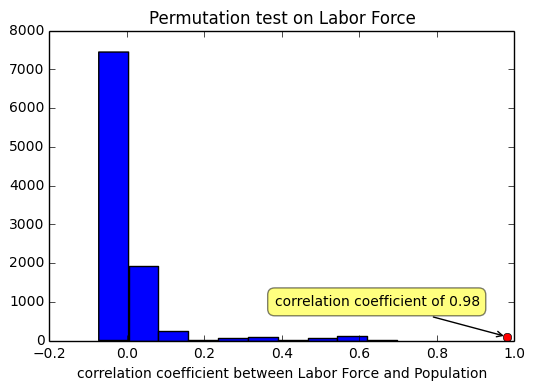

In [18]:
# Permute max_positive second column 100 times and see if we get a correlation as much as earlier. 
# Create a histogram of the random coefficients and it should converge around 0
r_values=[]
for i in range(1,10000):
    max_column2 = df[max_positive[1]]
    np.random.shuffle(max_column2.values)
    r, p = pearsonr(df[max_positive[0]].astype(float),df[max_positive[1]].astype(float))
    r_values.append(r)
    if r >= max_positive[1] :
        print 'Found a coefficient' + r,p
plt.hist(r_values)
plt.xlabel('correlation coefficient between '+ max_positive[1] + ' and '+ max_positive[0])
plt.title('Permutation test on Labor Force')
plt.plot(max_positive[2].astype(float),100,'ro')
plt.annotate('correlation coefficient of 0.98',
xy = (max_positive[2].astype(float),100), xytext = (-20, 20),
textcoords = 'offset points', ha = 'right', va = 'bottom',bbox = dict(boxstyle = 'round,pad=0.5', fc ='yellow',\
                  alpha = 0.5),arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

As shown in the above histogram built over the r values of 100 permutations, not one of them has a r value even closer to the original r value of 0.98. This validates that the p-value is 0,same as returned by numpy's pearsonr function.

Thus, we can confirm that Labor Force and Population are highly positvely correlated.

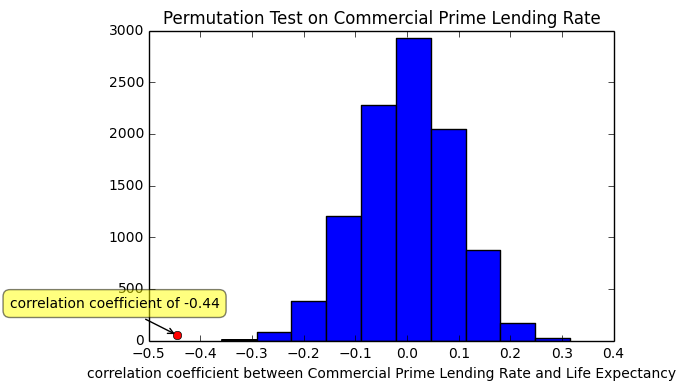

In [19]:
# Permute max_positive second column 100 times and see if we get a correlation as much as earlier. 
r_values = []
for i in range(1,10000):
    min_column2 = df[min_negative[1]]
    np.random.shuffle(min_column2.values)
    r, p = pearsonr(df[min_negative[0]].astype(float),df[min_negative[1]].astype(float))
    r_values.append(r)
    if p >= min_negative[2] :
        print 'Found a coefficient' + r,p
plt.hist(r_values)
plt.xlabel('correlation coefficient between '+ min_negative[1] + ' and '+ min_negative[0])
plt.title('Permutation Test on Commercial Prime Lending Rate')
plt.plot(min_negative[2],50,'ro')
plt.annotate('correlation coefficient of -0.44',xy=(min_negative[2],50),xytext=(30,20), textcoords ='offset points',ha='right',\
            bbox = dict(boxstyle = 'round,pad=0.5', fc ='yellow', alpha = 0.5),arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

As shown in the above histogram built over the r values of 100 permutations, not one of them has a r value even closer to the original r value of -0.44. This validates that the p-value is 0,same as returned by numpy's pearsonr function.

Thus, we can confirm that Commercial Prime Lending Rate and Life Expectancy are moderately negatively correlated.

This result is rather surprising since logically trying to relate the above two features doesn't intuitively suggest the negative correlation between them

## Q3
###  Set up a simple linear regression model to predict the average income (GDP per capita) as a function of other individual variables. Among all options, which model minimizes the squared error? Under this model, which countries are most above the forecast?   Which are most below?   Can you explain why?

In [20]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
df = pd.read_csv('country-data.csv')
df = df.replace('unknown', np.nan, regex=True)
df = df.dropna()

In [21]:
column1= 'GDP (PPP) in US $'

gdp_all = np.log(df[column1].astype(float)).reshape(-1,1)
gdp_train = np.log(df[column1][:-50].astype(float)).reshape(-1,1)
gdp_test = np.log(df[column1][-50:].astype(float)).reshape(-1,1)
results = []
for column2 in df.columns.difference([column1]):

    try:
        column_train = np.log(df[column2][:-50].astype(float)).reshape(-1,1)
        column_test = np.log(df[column2][-50:].astype(float)).reshape(-1,1)
        regr.fit(column_train,gdp_train)
        sqaured_error = (regr.predict(column_test) - gdp_test)**2
        mean_sqaured_error = np.mean(sqaured_error)
        
        result = [column2,regr.coef_[0][0],mean_sqaured_error]
        results.append(result)

    except Exception as ex:
        continue

result_array = np.array(results)

best_fit = result_array[result_array[:,2].astype(float)==np.min(result_array[:,2].astype(float))][0]


column_all = np.log(df[best_fit[0]].astype(float)).reshape(-1,1)
column_train = np.log(df[best_fit[0]][:-50].astype(float)).reshape(-1,1)
column_test = np.log(df[best_fit[0]][-50:].astype(float)).reshape(-1,1)
regr.fit(column_train,gdp_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### The feature that fit best with 'GDP (PPP) in US $' is 'Internet Users (circa 2009)' with a coefficient of 0.8654 and a mean sqaured error of 0.4153

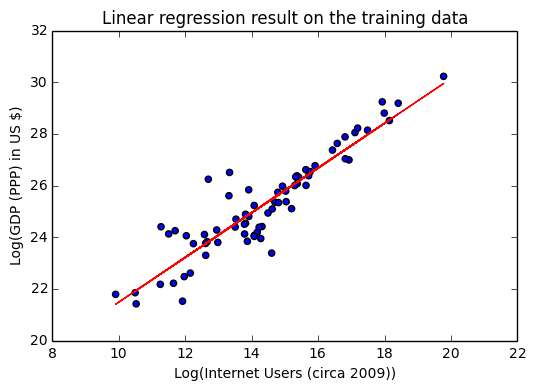

In [22]:
plt.scatter(column_train, gdp_train)
plt.plot(column_train, regr.predict(column_train),color='red',linewidth='1')
plt.xlabel('Log({0})'.format(best_fit[0]))
plt.ylabel('Log({0})'.format(column1))
plt.title("Linear regression result on the training data")
plt.show()

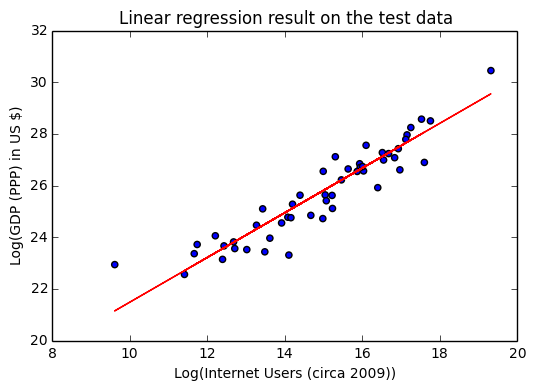

In [23]:
plt.scatter(column_test, gdp_test)
plt.plot(column_test, regr.predict(column_test),color='red',linewidth='1')
plt.xlabel('Log({0})'.format(best_fit[0]))
plt.ylabel('Log({0})'.format(column1))
plt.title("Linear regression result on the test data")
plt.show()

In [62]:
result_json = {
    "Email": "siashah@cs.stonybrook.edu",
    "Name" : "Siddharth Shah",
    "Q2":{
        "Negative": {
            "Attr0":min_negative[0],
            "Attr1":min_negative[1],
            "coeff":round(min_negative[2].astype(float),4),
            "p-value":round(min_negative[3].astype(float),4)
        },
        "Positive": {
            "Attr0":max_positive[0],
            "Attr1":max_positive[1],
            "coeff":round(max_positive[2].astype(float),4),
            "p-value":round(max_positive[3].astype(float),4)
        }
        },
    "Q3":{
        "Attr": best_fit[0],
        "Squared Error": round(best_fit[2].astype(float),4)
    },
    "SUBID":"110957500"
    }

file = open('HW2.json','w')
file.write(str(result_json))
file.close
print "Wrote the result to file HW2.json in the format as required"

Wrote the result to file HW2.json in the format as required


In [25]:
regr.fit(column_train,gdp_train)
squared_errors = (regr.predict(column_all) - gdp_all)**2
error_table =  pd.concat((df['Country Name'],pd.Series(squared_errors[:,0],index=df.index, name='Sqaured Error')),axis=1)

###### Below is the map of the countries plotted with Internet Users on the X axis and GDP on the Y axis along with our regression line

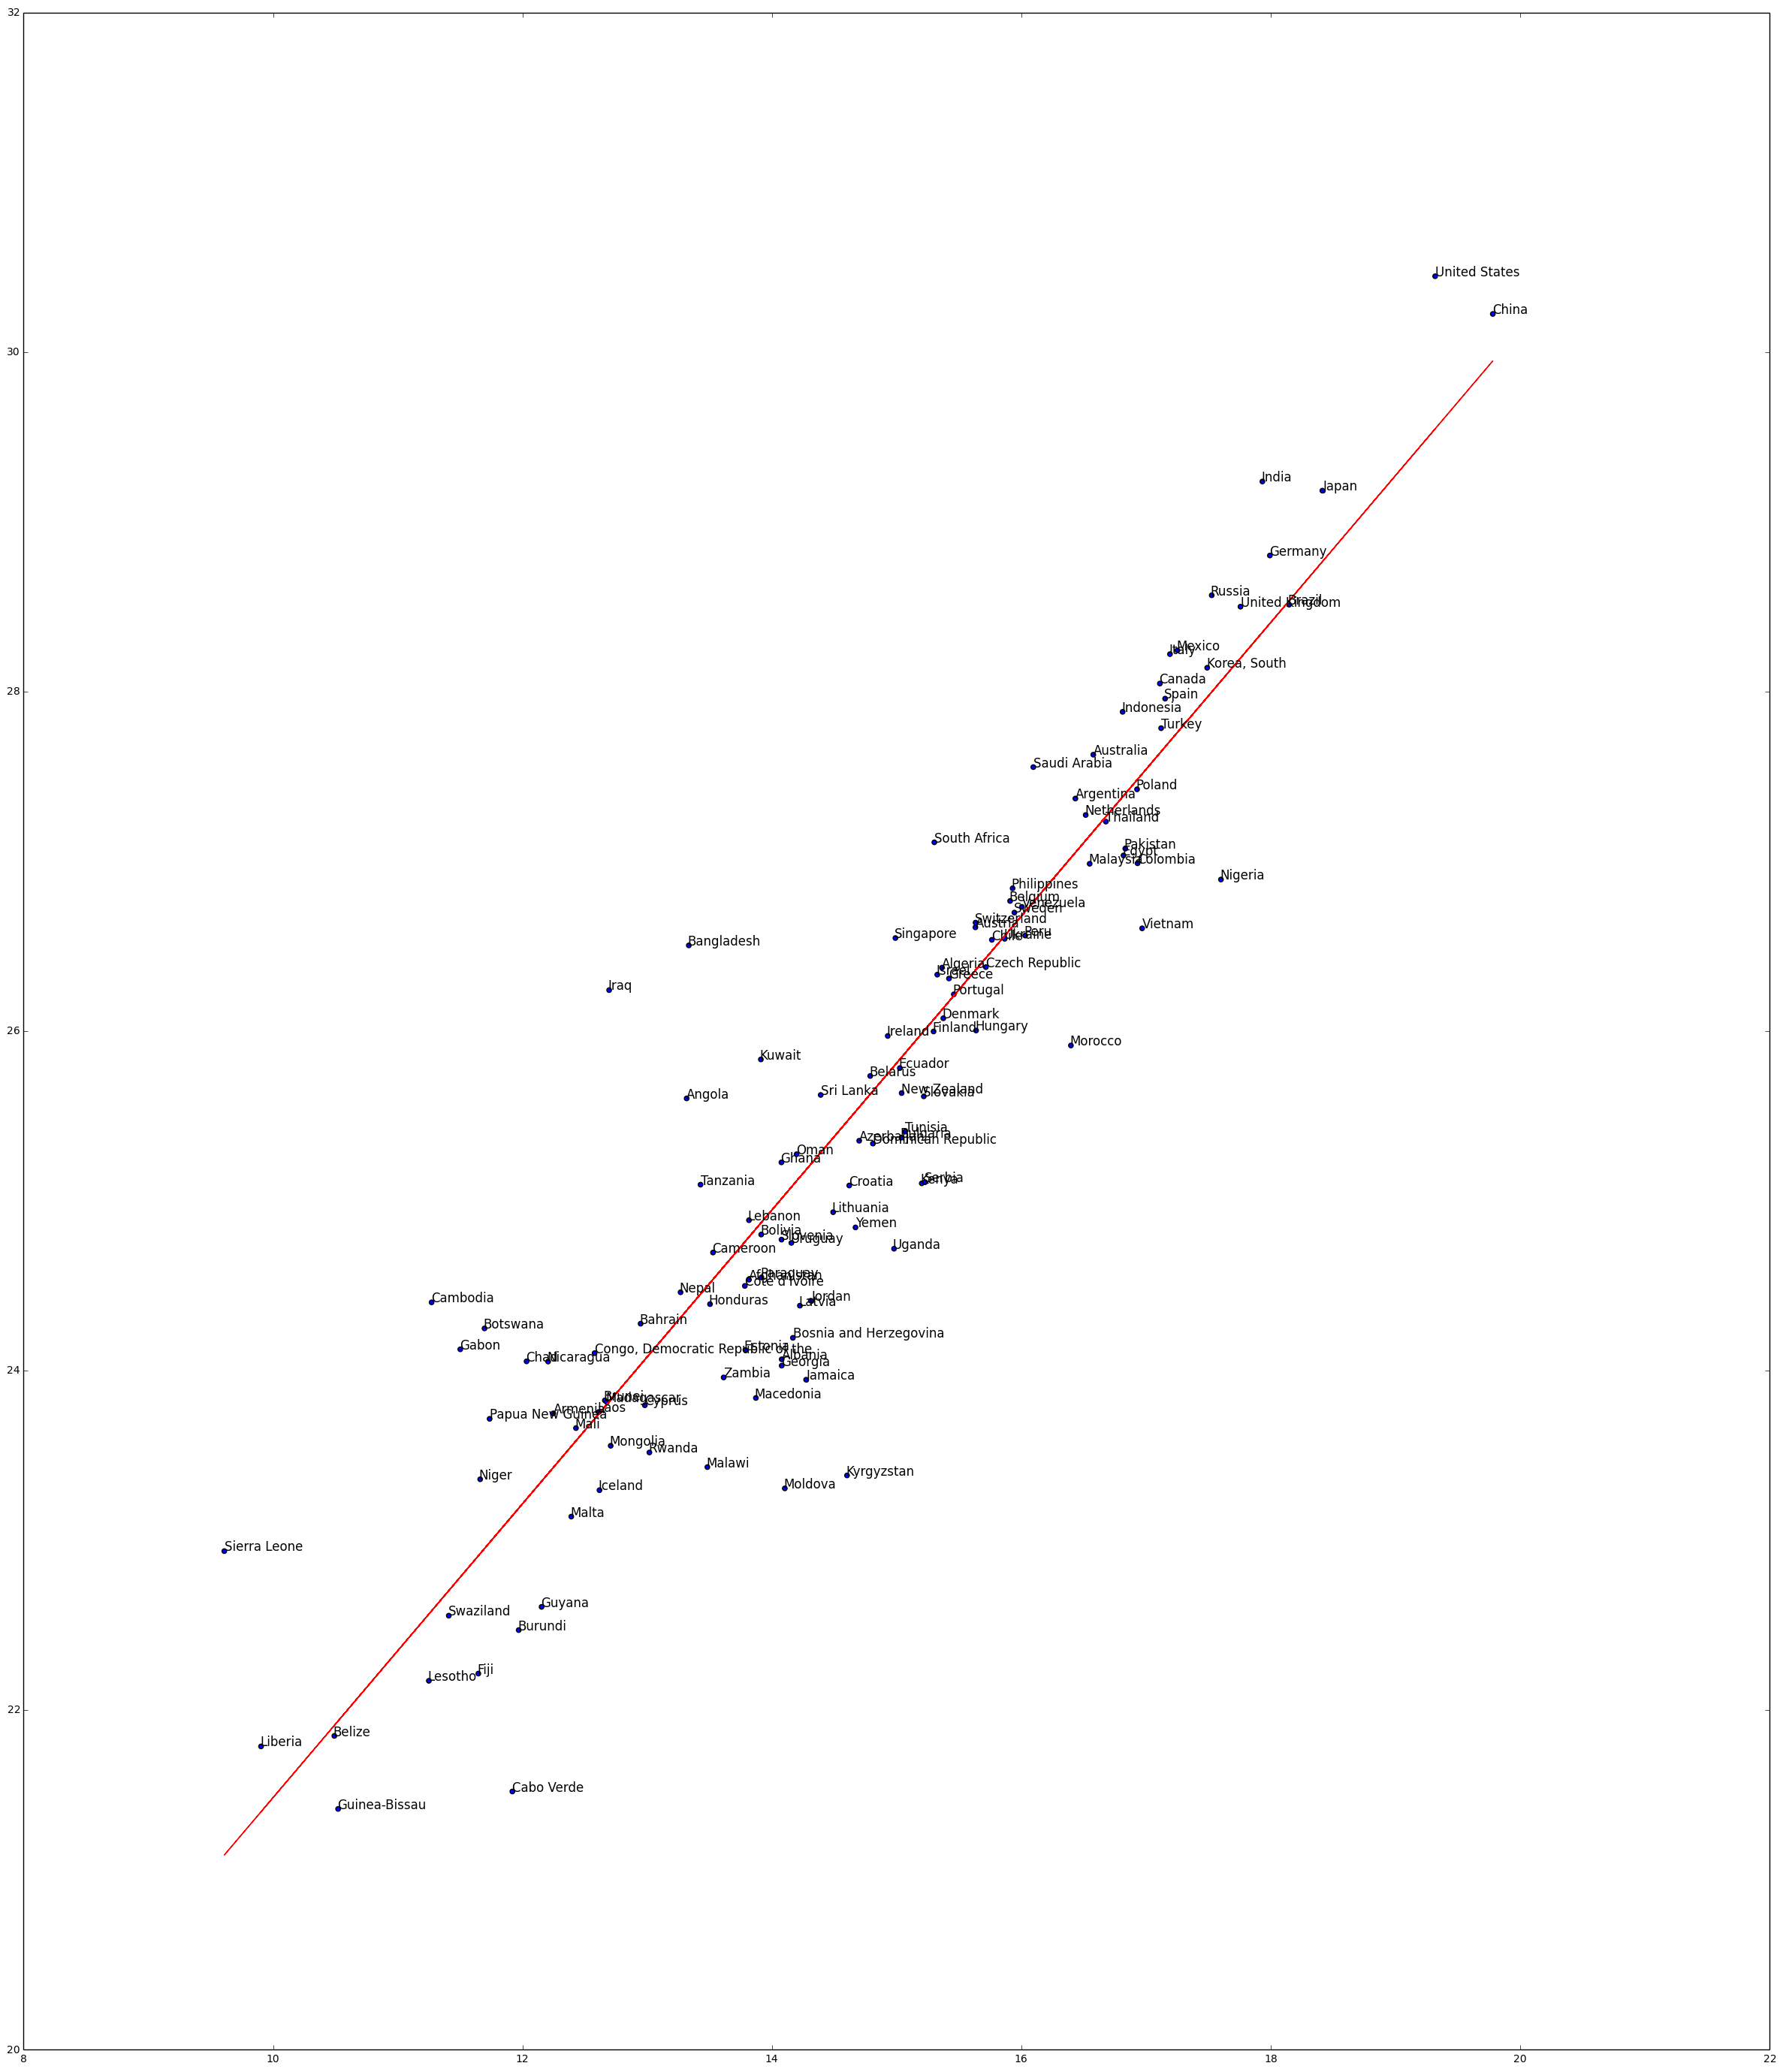

In [26]:
fig, plots = plt.subplots(figsize=(30,35))
plots.scatter(column_all, gdp_all)
plots.plot(column_all, regr.predict(column_all),color='red',linewidth='1')
for i, country_code in enumerate(df['Country Name']):
    plots.annotate(country_code, (column_all[i],gdp_all[i]), size='12')

###### Following are the 10 countries with the maximum squared error, and we can verify the same in the above map

In [27]:
(error_table.sort_values(by=['Sqaured Error']))[-10:]

,Country Name,Sqaured Error
4,Angola,1.560279
22,Botswana,1.681355
60,Gabon,1.800272
28,Cabo Verde,2.638675
115,Moldova,2.990863
155,Sierra Leone,3.204610
29,Cambodia,3.303074
93,Kyrgyzstan,4.346341
13,Bangladesh,4.560059
79,Iraq,5.879203


The squared error for the above countries are very high and thus should be furthest from our regression line. We can verify that from the map above. 

The reason for Kyrgyzstan to have a high squared error can be mainly because of the increasing youth population and the increasing reach of internet these days. However, the country themselves are in crisis and the government is unstable because of which, the number of internet users in not affecting the GDP of the country. 

The next four countries with high squared error have less internet users, compared to their GDP. This can be attributed to their government doing good work to improve the country. Also, countries like bangladesh do a lot of export to other countries which might be done by traditional farmers who are not internet savvy, but still manage to make a buck.

In countries like USA, Chine, India, Japan who have maximum number of internet users as well as the GDP, the adoption of internet is huge and it is a sign of businesses flourishing in the country.

## Q4
### Set up a scoring/ranking function to measure general social welfare.   Which countries do best by your measure?   Which do worst?    Write a few paragraphs to describe your measure and evaluate how good/bad you think the results are.

In [28]:
df = pd.read_csv('country-data.csv')

In order to devise the scoring function, we are using the following features: 
* **Net Migration Rate/1000 Population** - This indicates if the people of the country are happy with the government and the overall welfare of the country
* **GDP per capita $** - The GDP per capita is the measure of the country's per person economy. It is one of the primary indicators to measure the country's economy.
* **Labor Force / Population** - This metric shows the employment rate of the country and thus gives a good estimate of the people's sentiment. Countries with very high employment percentage tend to have happier people, thus increasing the social welfare score
* **Health Expenditure/GDP** - The health expenditure also gives us an insight into the country's capacity to build hospitals and provide health benefits to its citizens.
* **Life Expectancy** - THe higher the life expectancy the higher our social welfare score as it implies that the citizens have better healthcare and better food produce.
* **Internet Users / Population** - The internet users gives us an idea of how technologically advanced the country is, so, essentially, is the country adopting technology fast.

In [29]:
features = pd.concat((df['Country Name'],df['Net Migration Rate/1000 Population'], pd.Series(df['GDP (PPP) in US $']/df[u'Population'], name="Gdp/Pop")\
                      ,df['Health Expenditure/GDP'],df['Literacy Rate (%)'],df[u'Government Type'],df['Life Expectancy'],\
                       df['Labor Force'],df[u'Population'],df['Internet Users (circa 2009)']),axis=1)
features = features.replace('unknown',np.nan, regex=True)
features = features.dropna()
train_data = features[:50]
test_data = features[50:]

Since all the above features are measured in different scales, it is important for us to normalize them to a common scale to allow equal contribution of each feature.

**Normalizing GDP per capita**

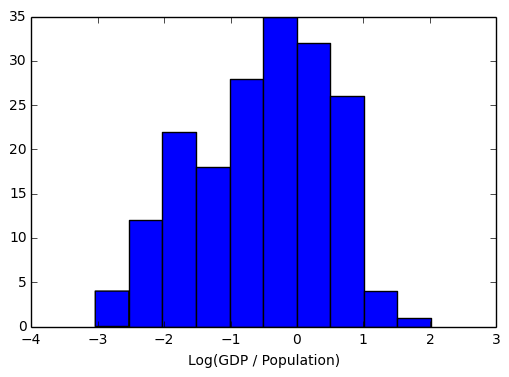

In [30]:
features['Gdp/Pop_z'] = (np.log(features['Gdp/Pop']) - np.log(features['Gdp/Pop'].mean()))/np.log(features['Gdp/Pop']).std(ddof=0)
plt.hist(features['Gdp/Pop_z'])
plt.xlabel('Log(GDP / Population)')

**Normalizing Health Expenditure / GDP**

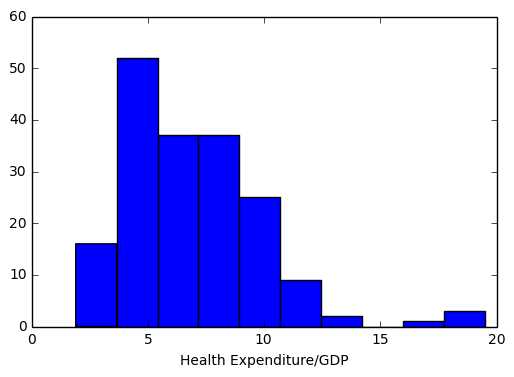

In [31]:
health = features['Health Expenditure/GDP'].astype(float)
features['health_z'] = (health - health.mean())/health.std(ddof=0)
plt.xlabel('Health Expenditure/GDP')
plt.hist(health)
plt.show()

**Normalizing Literacy Rate %**

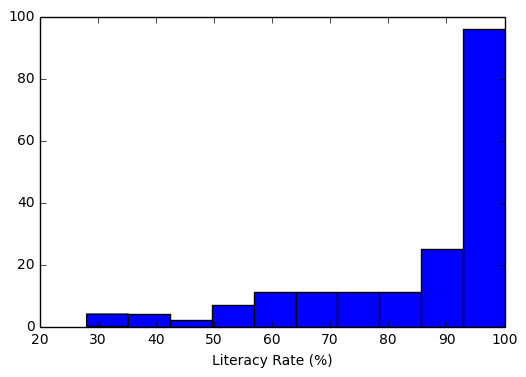

In [32]:
literacy = features['Literacy Rate (%)'].astype(float)
features['literacy_z'] = (literacy- literacy.mean())/literacy.std(ddof=0)
plt.hist(literacy)
plt.xlabel('Literacy Rate (%)')
plt.show()

**Normalizing Literacy Rate %**

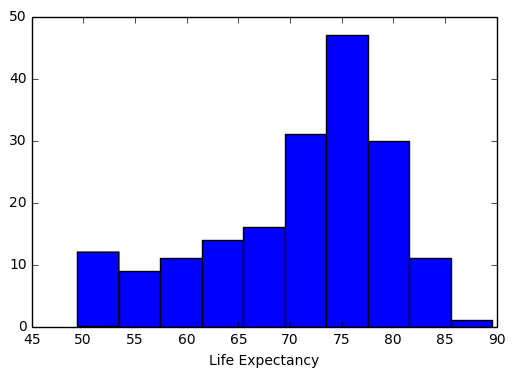

In [33]:
life = features['Life Expectancy'].astype(float)
features['life_z'] = (life- life.mean())/life.std(ddof=0)
plt.hist(life)
plt.xlabel('Life Expectancy')
plt.show()

**Normalizing Labor Force / Population**

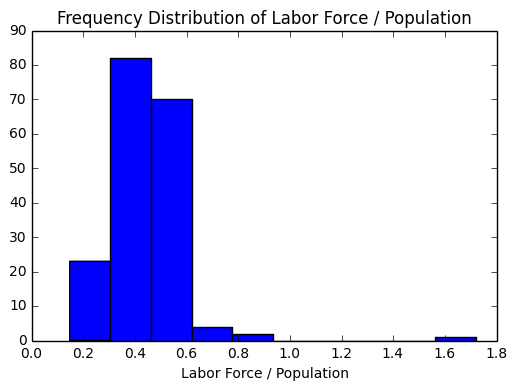

In [34]:
pop = features[u'Population'].astype(float)
labor = features['Labor Force'].astype(float)
labor_pop = labor/pop
features['labor/pop'] = labor_pop

plt.hist(labor_pop)
plt.xlabel('Labor Force / Population')
plt.title('Frequency Distribution of Labor Force / Population')
plt.show()

**Normalizing Interent Users / Population**

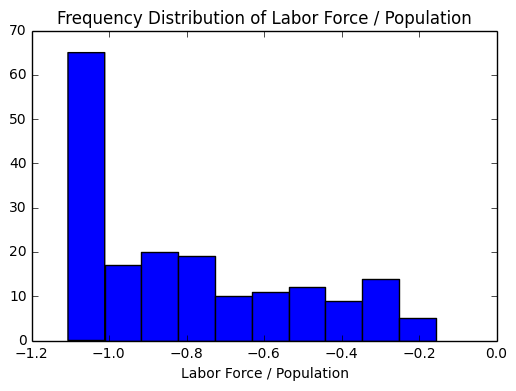

In [35]:
internet = features[u'Internet Users (circa 2009)'].astype(float)
pop = features[u'Population'].astype(float)
internet_pop = (internet/pop)
features['internet/pop'] = internet_pop - internet_pop.mean()/internet_pop.std(ddof=0)

plt.hist(features['internet/pop'])
plt.xlabel('Labor Force / Population')
plt.title('Frequency Distribution of Labor Force / Population')
plt.show()

**Normalizing Migration Rate of countries**

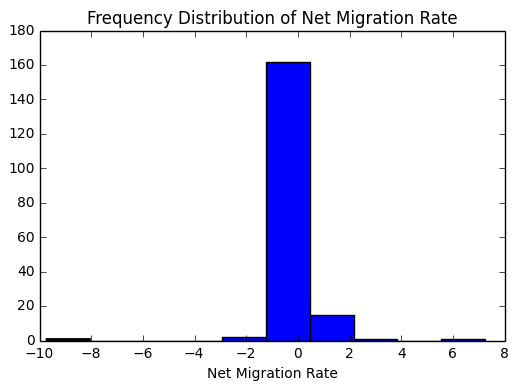

In [36]:
migration_data = features['Net Migration Rate/1000 Population'].astype(float)
features['mig_z'] = (migration_data - migration_data.mean())/migration_data.std(ddof=0)
plt.hist(features['mig_z'])
plt.xlabel('Net Migration Rate')
plt.title('Frequency Distribution of Net Migration Rate')

Here we can observe that there are outliers on both the sides, which means that people are migrating from the leftmost country to the rightmost country. The country to which the people are migrating might skew our results as making it more desirable, hence, if we have countries with very high negative deviation, we normalize the ones with very high positive deviation to avoid incorrect results.

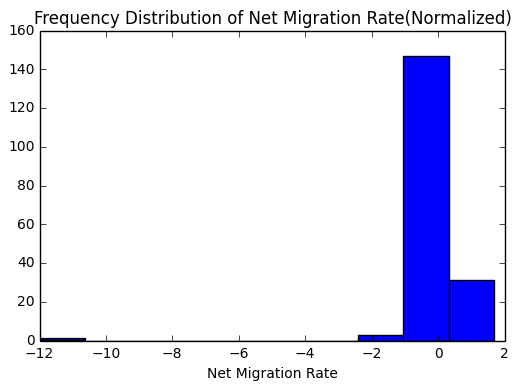

In [37]:
mig_outliers=features.loc[migration_data.isin(migration_data.sort_values(ascending=False)[0:4].values),'Net Migration Rate/1000 Population' ] = np.median(migration_data)
migration_data = features['Net Migration Rate/1000 Population'].astype(float)
features['mig_z'] = (migration_data - migration_data.mean())/migration_data.std(ddof=0)
plt.hist(features['mig_z'])
plt.title('Frequency Distribution of Net Migration Rate(Normalized)')
plt.xlabel('Net Migration Rate')

Thus, now we only have the negative outliers, which seem to make sense, as they are not desirable countries to live in due to war zones or other reasons.

**Social Welfare Function**

The first social welfare function generated was the simple addition of all the normalized features.

Social welfare = Net Migration Rate/1000 Population + GDP per capita + Literacy Rate + Health Expenditure / GDP + Life Expectancy + Labor Force / Population + Internet Users / Population

However, on giving equal importance to all seemed a little unfair while calculating the Social Welfare as some features have more import on the social welfare than the others and thus we give 2 as importance to Migration Rate and Health Expenditure/GDP. Thus, the resultant social welfare is: 

Social welfare = 2*Net Migration Rate/1000 Population + GDP per capita + Literacy Rate + 2*Health Expenditure / GDP + Life Expectancy + Labor Force / Population + Internet Users / Population

In [38]:
features['social_welfare_score'] = features['Gdp/Pop_z']+ 2*features['mig_z'] + features['literacy_z']+ 2*features['health_z'] + features['life_z'] + features['labor/pop']+ features['internet/pop']
features = features.sort_values(by='social_welfare_score',ascending=False).loc[:,['Country Name','social_welfare_score']]

**Top 10 countries with the best social welfare**

In [39]:
features.loc[:,['Country Name','social_welfare_score']][:10]

,Country Name,social_welfare_score
187,United States,11.069439
31,Canada,7.368642
169,Switzerland,7.300451
125,Netherlands,7.051410
130,Norway,6.733419
59,France,6.275976
46,Denmark,6.272096
168,Sweden,6.139136
63,Germany,6.136845
163,Spain,5.954953


**Worst countries with the lowest social welfare**

In [40]:
features.loc[:,['Country Name','social_welfare_score']][-5:]

,Country Name,social_welfare_score
108,Mali,-8.016031
32,Central African Republic,-8.959836
128,Niger,-9.172134
33,Chad,-9.689014
170,Syria,-27.851526


**References:**
* https://en.wikipedia.org/wiki/List_of_countries_by_Social_Progress_Index
* http://www.dataminingblog.com/standardization-vs-normalization/

## Q5
### Set up a meaningful distance function to measure how similar/difference pairs of countries are.     Produce a table showing the nearest and farthest neighbor to each nation on earth?   
### Write a short analysis of this table describing: (a) What  kinds of similarities does your measure get right?   (b) What are the most interesting/surprising pairs to fall out of this analysis?  and (c) Where does it goof up?


Two countries can be similar or different in a lot of different ways. 
For ex. We can compare 2 countries based on their size and structure, comparing area, coastlines, population etc. However this might result in incorrect data as this model might suggest that Russia and United States are similar but in reality they are a lot different.
Or we can compare them with respect to their ratios (population density, per capita income, literacy rate etc) which might result in a smaller country like New Zealand similar to Australia
We can compare countries on their administration as well. One may say that India and China are quite similar to each other with respect to population and economy, however, they are very different with respect to their governments.
The Challenge here is to generate a function which takes all these parameters under consideration and quantifies the similarity between countries.

In order to find similarity, we can divide the features into multiple groups and generate a similarity for each group which can further contribute to the overall similarity.
The benefit of grouping is that even though a country is extremely different in one group but being identical in other group would be accounted for the overall similarity.
Below is the list of features that we have: 

In [41]:
df = pd.read_csv('country-data.csv')
[x for x in df.columns.values]

['Country Name',
 'Country Code',
 'Government Type',
 'Capital City',
 'Date of Founding/Independence',
 'Latitude of Capital',
 'Longitude of Capital',
 'Population',
 'Life Expectancy',
 'GDP (PPP) in US $',
 'Area (sq km)',
 'Land Boundaries (km)',
 'Coastline (km)',
 'Literacy Rate (%)',
 'Health Expenditure/GDP',
 'Military Expenditure/GDP',
 'Renewable Water Resources (cu km)',
 'Net Migration Rate/1000 Population',
 'Labor Force',
 'Internet Users (circa 2009)',
 'Commercial Prime Lending Rate']

We can create the following relevant groups from these features
* **Physical Structure**
    * Population
    * Area (sq km)
    * Land Boundaries (km)
    * Coastline (km)
* **Population & related metrics**
    * Population
    * Life Expectancy
    * Literacy Rate (%)
    * Internet Users (circa 2009)
    * Labor Force   
    * Net Migration Rate/1000 Population
* **Economics**
    * GDP (PPP) in US $
    * Health Expenditure/GDP
    * Military Expenditure/GDP
    * Renewable Water Resources (cu km)
    * Commercial Prime Lending Rate
* **Government**
    * Government Type
    * Date of Founding/Independence
    


The given dataset contains 52 different types of government, and having 52 types for a dataset with 200 countries does not make sense and thus we are creating 5 different types as follows: 
* Democracy
* Monarchy 
* Republic
* Communism
* Other

In [42]:
def replace_gov_type(gtype):
    if 'monarchy' in gtype:
        return 'monarchy'
    elif 'communist' in gtype or 'communism' in gtype:
        return 'communism'
    elif 'democracy' in gtype or 'democratic' in gtype:
        return 'democracy'
    elif 'republic' in gtype:
        return 'republican'
    else:
        return 'other'

In [43]:
df['Government Type'] = df['Government Type'].apply(replace_gov_type)

Also we need to normalize the data in each group to be able to create a score which can be used for all the groups
We are using the scalar fir function which reduces all the features in the range of -1 to 1, thus allowing us to perform calculations on them.

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = df.replace('unknown',np.nan)
df = df.dropna()
df = df.replace('1.78%','1.78')

In [45]:
df_1 = pd.concat((df['Population'],\
 df['Life Expectancy'],\
 df['GDP (PPP) in US $'],\
 df['Area (sq km)'],\
 df['Land Boundaries (km)'],\
 df['Coastline (km)'],\
 df['Literacy Rate (%)'],\
 df['Health Expenditure/GDP'],\
 df['Military Expenditure/GDP'],\
 df['Renewable Water Resources (cu km)'],\
 df['Net Migration Rate/1000 Population'],\
 df['Labor Force'],\
 df['Internet Users (circa 2009)'],\
 df['Commercial Prime Lending Rate']),axis=1)
df_1.index = df.index

In [46]:
df_scaled =  pd.DataFrame(scaler.fit_transform(df_1), columns=[\
 'Population',\
 'Life Expectancy',\
 'GDP (PPP) in US $',\
 'Area (sq km)',\
 'Land Boundaries (km)',\
 'Coastline (km)',\
 'Literacy Rate (%)',\
 'Health Expenditure/GDP',\
 'Military Expenditure/GDP',\
 'Renewable Water Resources (cu km)',\
 'Net Migration Rate/1000 Population',\
 'Labor Force',\
 'Internet Users (circa 2009)',\
 'Commercial Prime Lending Rate'],index=df.index)
df_scaled = pd.concat((df_scaled,df['Country Name']),axis=1)

In order to calculate the similarity score, we calculate the Eucledian Distance between the features for every 2 rows 

In [47]:
from math import*
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)

def cosin_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

In [48]:
def similarity_func(x,y):
    # Eucldian Distance
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [49]:
results = []
for i,row1 in df_scaled.iterrows():
    country1 = row1['Country Name']
    for j,row2 in df_scaled.iterrows():
        country2 = row2['Country Name']
        if not row1.equals(row2):
            diff =0
            diff = similarity_func(row1[:-2],row2[1:-2])
            results.append([country1,country2,diff])

**The below is the similarity and differenct table for every country**

Each country has 2 rows associated with it in the first column.
The first row has details about the most similar country, where as the second row has details about the most different country with their similarity scores in the third column.

In [52]:
result_df = pd.DataFrame(results)
result_df.sort_values(by=2,axis=0)
results_countries = pd.DataFrame()
for row in df['Country Name']:
    country_result = result_df[result_df.iloc[:,0]==row]
    results_countries = pd.concat([results_countries,country_result.loc[country_result.iloc[:,2]==np.min(country_result.iloc[:,2])]])
    results_countries = pd.concat([results_countries,country_result.loc[country_result.iloc[:,2]==np.max(country_result.iloc[:,2])]])
results_countries = results_countries.rename(columns = {'0':'Country 1','1':'Country 2', '2':'Similarity Score'})

In [53]:
results_countries.loc[results_countries.iloc[:,0]=='China']

,0,1,2
3354,China,United States,1.454698
3280,China,Gabon,2.381441


As seen above China is most similar to United States, which is a reasoble result as they are big countries with large population and GDP. Below is the origin data for the China, United States and Gabon.
Also, China is most different Gabon, which is a very small country comparatively in size as well as GDP. The life expectancy is also drastically low compared to China.

In [54]:
df.loc[df['Country Name'].isin(['United States', 'China','Gabon'])]

,Country Name,Country Code,Government Type,Capital City,Date of Founding/Independence,Latitude of Capital,Longitude of Capital,Population,Life Expectancy,GDP (PPP) in US $,...,Land Boundaries (km),Coastline (km),Literacy Rate (%),Health Expenditure/GDP,Military Expenditure/GDP,Renewable Water Resources (cu km),Net Migration Rate/1000 Population,Labor Force,Internet Users (circa 2009),Commercial Prime Lending Rate
35,China,CN,other,Beijing,10/1/1949,39 55 N,116 23 E,1355692576,75.15,13390000000000,...,22457.0,14500.0,95.1,5.2,1.99,2840,-0.32,797600000,389000000,5.73
60,Gabon,GA,republican,Libreville,8/17/1960,0 23 N,9 27 E,1672597,52.06,30060000000,...,3261.0,885.0,89,3.2,1.34,164,-2.07,629100,98800,15
187,United States,US,democracy,"Washington, DC",7/4/1776,38 53 N,77 02 W,318892103,79.56,16720000000000,...,12048.0,19924.0,99,17.9,4.35,3069,2.45,155400000,245000000,3.3


In [55]:
results_countries.loc[results_countries.iloc[:,0]=='United States']

,0,1,2
13894,United States,Russia,1.592184
13862,United States,Kuwait,2.332587


In [56]:
df.loc[df['Country Name'].isin(['United States', 'Russia','Kuwait'])]

,Country Name,Country Code,Government Type,Capital City,Date of Founding/Independence,Latitude of Capital,Longitude of Capital,Population,Life Expectancy,GDP (PPP) in US $,...,Land Boundaries (km),Coastline (km),Literacy Rate (%),Health Expenditure/GDP,Military Expenditure/GDP,Renewable Water Resources (cu km),Net Migration Rate/1000 Population,Labor Force,Internet Users (circa 2009),Commercial Prime Lending Rate
92,Kuwait,KW,other,Kuwait City,6/19/1961,29 22 N,47 58 E,2742711,77.64,165800000000,...,475.0,499.0,93.9,2.7,0,0.02,-1.11,2380000,1100000,4.9
143,Russia,RU,other,Moscow,8/24/1991,55 45 N,37 36 E,142470272,70.16,2553000000000,...,22407.0,37653.0,99.7,6.2,4.47,4508,1.69,75290000,40853000,9.3
187,United States,US,democracy,"Washington, DC",7/4/1776,38 53 N,77 02 W,318892103,79.56,16720000000000,...,12048.0,19924.0,99,17.9,4.35,3069,2.45,155400000,245000000,3.3


At first, it might seem surprsing that since United States was most similar to China, we would expect a two way relationship. At least we can expect that since we got China as a good match with United States, US would likely have China in its top similar countries. However, that is not the case as seen below.

In [57]:
(result_df.loc[result_df.iloc[:,0]=='United States'].sort_values(by=2, ascending=True))[:10]

,0,1,2
13894,United States,Russia,1.592184
13800,United States,Afghanistan,1.708596
13851,United States,India,1.737625
13817,United States,Brazil,1.745051
13829,United States,"Congo, Democratic Republic of the",1.762865
13824,United States,Canada,1.778903
13898,United States,Sierra Leone,1.834584
13874,United States,Mali,1.843109
13868,United States,Liberia,1.844515
13825,United States,Chad,1.893537


This suggests that our model is not entirely correct. One of the reasons could be because of normalization. 
Let's take a look at United States and China's original data nad the normalized data to understand if normalization could be the reason for randomness in our results

**Original Data**

In [58]:
df.loc[df['Country Name'].isin(['United States', 'China'])][df_scaled.columns]

,Population,Life Expectancy,GDP (PPP) in US $,Area (sq km),Land Boundaries (km),Coastline (km),Literacy Rate (%),Health Expenditure/GDP,Military Expenditure/GDP,Renewable Water Resources (cu km),Net Migration Rate/1000 Population,Labor Force,Internet Users (circa 2009),Commercial Prime Lending Rate,Country Name
35,1355692576,75.15,13390000000000,9596960.0,22457.0,14500.0,95.1,5.2,1.99,2840,-0.32,797600000,389000000,5.73,China
187,318892103,79.56,16720000000000,9826675.0,12048.0,19924.0,99,17.9,4.35,3069,2.45,155400000,245000000,3.3,United States


**Normalized Data**

In [63]:
df_scaled.loc[df['Country Name'].isin(['United States', 'China'])]

,Population,Life Expectancy,GDP (PPP) in US $,Area (sq km),Land Boundaries (km),Coastline (km),Literacy Rate (%),Health Expenditure/GDP,Military Expenditure/GDP,Renewable Water Resources (cu km),Net Migration Rate/1000 Population,Labor Force,Internet Users (circa 2009),Commercial Prime Lending Rate,Country Name
35,1.000000,0.734152,0.800813,0.561275,1.000000,0.071754,0.931850,0.168605,0.231127,0.344952,0.101260,1.000000,1.000000,0.125257,China
187,0.235045,0.860080,1.000000,0.574711,0.536492,0.098595,0.986092,0.906977,0.505226,0.372767,0.130848,0.194713,0.629806,0.069714,United States


**Observations**
1. Simply normalizing all the data to a scale between 0 to 1, has a very huge impact on outliers. As we can see above, GDP of US and China is very high compared to other countries, and thus we can simply consider their similarity to be 1 with respect to GDP. However, in the above example, we have introduced an scaled difference of 0.2 which is significant when compared to the 0.03, which is the scaled difference of the Net Migration Rate
2. Our model, gives more significance to the difference in GDP, which in the ideal case should be insignificant for our example, where it gives less significane to the Net migration rate which in the ideal case should have been significant for our example.
3. Another such example would be of Internet Users and Commercial Prime Lending Rate.

**What can we do to improve?**

We are currently using the Min Max Scalar which normalizes all features to between 0 and 1. Instead, we can use some other function which takes care of the distribution 
